In [1]:
import pandas as pd
df = pd.read_excel('/Users/neil/Documents/code/Research-Project/data/stock_data/S&P500_data.xlsx')

In [2]:
df

,Date,Open,High,Low,Close*,Avg. Sentiment Score,Tragectory
0,2023-06-29,4374.94,4398.39,4371.97,4396.44,0.5940,1
1,2023-06-30,4422.44,4458.48,4422.44,4450.38,0.6130,1
2,2023-07-03,4450.48,4456.46,4442.29,4455.59,0.5100,1
3,2023-07-05,4442.04,4454.06,4436.61,4446.82,0.6980,0
4,2023-07-06,4422.62,4422.62,4385.05,4411.59,0.4816,0
5,2023-07-07,4404.54,4440.39,4397.40,4398.95,0.4500,0
6,2023-07-10,4394.23,4412.60,4389.92,4409.53,0.5300,1
7,2023-07-11,4415.55,4443.64,4408.46,4439.26,0.4800,1
8,2023-07-12,4467.69,4488.34,4463.23,4472.16,0.5220,1
9,2023-07-13,4491.50,4517.38,4489.36,4510.04,0.7100,1


In [3]:
features = df[['Close*', 'Avg. Sentiment Score', 'Tragectory']]

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

/Users/neil/Documents/code/Research-Project/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/neil/Documents/code/Research-Project/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/neil/Documents/code/Research-Project/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/neil/Documents/code/Research-Project/venv/lib/python3.10/site-p

Text(0, 0.5, 'wcss')

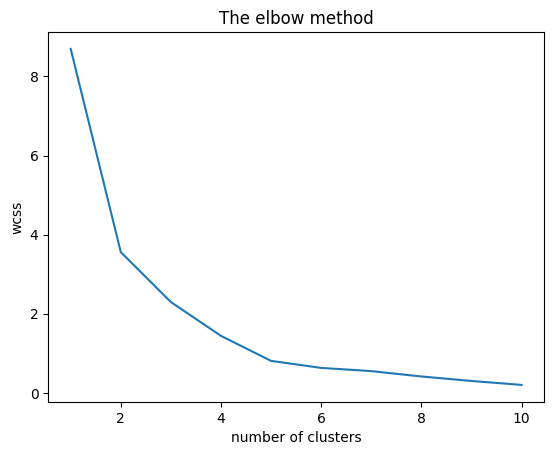

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(normalized_features)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')  

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(normalized_features)

/Users/neil/Documents/code/Research-Project/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [8]:
import plotly.graph_objects as go
fig = go.Figure(data=[
    go.Scatter3d(
        x=df[df['Cluster'] == 0]['Close*'],
        y=df[df['Cluster'] == 0]['Avg. Sentiment Score'],
        z=df[df['Cluster'] == 0]['Tragectory'],
        mode='markers',
        marker=dict(color='green', size=5),
        name='Cluster 1 (Tragectory UP)'
    ),
    go.Scatter3d(
        x=df[df['Cluster'] == 1]['Close*'],
        y=df[df['Cluster'] == 1]['Avg. Sentiment Score'],
        z=df[df['Cluster'] == 1]['Tragectory'],
        mode='markers',
        marker=dict(color='red', size=5),
        name='Cluster 0 (Tragectory Down)'
    )
])

fig.update_layout(scene=dict(
    xaxis_title='Close*',
    yaxis_title='Avg. Sentiment Score',
    zaxis_title='Tragectory'
))
fig.show()